# 1. Introduction to spin physics with Qiskit 1.x
-----------------------------------------------------------

## "Hello world"

In this tutorial, we are going to explore the basics of using IBM's quantum devices. For beginners, the most versatile way to make use of this technology is to install [website](https://qiskit.org/) locally. 

You can download Qiskit from the main Qiskit [website](https://qiskit.org/). This website also contains detailed installation information. Note that it is recommended to create a separate virtual environment, as described in the instructions. A minimal installation of Python, Jupyter, and ```qiskit[visualization]``` as described on the Qiskit website is sufficient for running examples in this tutorial.

<b>Important note: </b> To (a) run circuits on the actual quantum hardware and (b) gain access to IBM Quantum Composer environment, you'll need to create a free IBM Quantum [account](https://www.ibm.com/quantum-computing/). Additionally, to run circuits on real quantum hardware from a Jupyter notebook, you'll need to install [Qiskit Runtime](https://www.ibm.com/quantum/qiskit?utm_content=SRCWW&p1=Search&p4=43700074687245140&p5=e&p9=58700008222706614&gclid=Cj0KCQjwhb60BhClARIsABGGtw_e2t5yHR1eBAykAQJrRLqEMrwTMJhn28Glh8pC7L4GH0YcHXZSgygaAhPBEALw_wcB&gclsrc=aw.ds).

In what follows, it is assumed you have an IBM Quantum account and are working on a local installation of Qiskit. 

Aside from importing ```qiskit```, all we need to get started is the ``standard'' stuff. For those of you new to Python or Jupyter notebooks, the following cell is <i>executable</i>, and you can run the commands by holding ```SHIFT``` and pressing ```ENTER```.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from qiskit import *

A classical bit can take on the values of 0 or 1. A small piece of magnetic material can physically represent this bit. Specifically, taking the $z$ axis as our preferred direction, a magnetization pointing "up" can represent 0 while "down" can represent 1. External magnetic fields can be used to flip these domains invidually, allowing arbitrary binary information to be encoded in some large collection of bits.

In a <i>quantum</i> computer, these bits are replaced by <b>qubits</b>, or two-level quantum mechanical systems which can exist in an arbitrary superposition of two basis states (labeled $\left|0\right\rangle$ and $\left|1\right\rangle$).

$$\left|\psi\right\rangle = \alpha \left|0\right\rangle + \beta \left|1\right\rangle$$

A measurement of the state then results in the system "collapsing" to either $\left|0\right\rangle$ or $\left|1\right\rangle$. The quantum "weirdness" results from the fact that before such a measurement, the system really doesn't have a well-defined "value" (0 or 1). 

The states $\left|0\right\rangle$ and $\left|1\right\rangle$ can be mapped to the spin basis states $\left|+\right\rangle$ and $\left|-\right\rangle$ where

$$\hat{S}^{z} \left|\pm\right\rangle = \pm \frac{\hbar}{2}\left|\pm\right\rangle$$

<b>Important warning:</b> In the Qiskit documentation, the labels $\left|\pm\right\rangle$ actually refer to the linear combinations $\left|\pm\right\rangle \rightarrow \frac{1}{\sqrt{2}}\left(\left|0\right\rangle \pm \left|1\right\rangle\right)$ rather than the eigenstates of $\hat{S}^{z}$ as in McIntyre's [textbook](https://sites.science.oregonstate.edu/physics/coursewikis/portfolioswiki/texts_quantumbook_start.html). In an effort to make these materials congruent with the textbook's notation (employed widely in physics literature), I will follow McIntyre's conventions. But be warned that you might see some seemingly-strange conventions if you go poking around the [IBM quantum learning resources](https://learning.quantum.ibm.com/). 

<b>Important Note: </b> As of 2024, the <i>excellent</i> Qiskit textbook has been replaced by [IBM quantum learning resources](https://learning.quantum.ibm.com/). The deprecated textbook source can still be found on GitHub [here](https://github.com/qiskit-community/qiskit-textbook). You'll find IBM has its own sort of "quick start guide" that allows you to essentially copy-and-paste some commands to send a job to a 127-qubit device. It's very easy to do (try it), but their "Hello World" example (as of July, 2024) is substantially more sophisticated than the examples presented here. It's admittedly impressive, but it can be difficult to appreciate just <i>what</i> is being accomplished without some signficant background in quantum information. Their free courses are quite good at providing this background, but the required time investment might be steep. The aim of the present tutorial is to start with a humble yet conceptually clear example of a task and explore how to perform this task on quantum hardware. 

Let's consider an extremely circuit to see how some of this stuff works. The following commands create a single-qubit circuit (so it's like simulating a single spin):

In [7]:
qr = QuantumRegister(1,'q')
cr = ClassicalRegister(1,'c')

circ = QuantumCircuit(qr,cr)

The ```QuantumRegister(n)``` creates a circuit with ```n``` qubits. From this point on, you can mentally replace "qubit" by "spin." Note that upon measuring a qubit (just like when measuring a spin), the system takes a definite state. The ```ClassicalRegister(n)``` is used to record the state of the system. If ```n``` qubits are used, we will need ```n``` slots in the classical register to record the states for each qubit in the system if we are to measure each qubit once. In certain applications, it might be desirable to measure a qubit multiple times throughout the circuit or not measure a particular qubit at all. The requirement is that the ```ClassicalRegister(n)``` contains a slot for each measurement to be performed, and this does <i>not</i> have to coincide with the number of qubits in the circuit.


<b>Important note:</b> By default, each qubit is initialized to the state $\left|0\right\rangle$. That means, we can pretend our quantum circuit represents a collection of spin-$\frac{1}{2}$ degrees of freedom initialized in $\left|+\right\rangle$.

Once we have the circuit structure, we can start to add things to it. For simplicity, let's just measure the state of the system. That's about the one thing right now for which we can probably guess the final answer. The first line below measures the state of each qubit (here just one) and records that information in the classical register. The line below that will draw a visual depiction of our humble circuit.



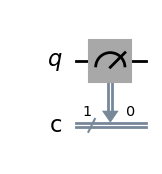

In [8]:
circ.measure(qr,cr)
circ.draw('mpl')

A more basic schematic can be created as follows:

In [9]:
circ.draw()

┌─┐
  q: ┤M├
     └╥┘
c: 1/═╩═
      0

If you have $\LaTeX$ installed, you can also make use of $\LaTeX$ rendering of circuit diagrams:

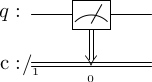

In [11]:
circ.draw('latex')

The best practice is to run any circuit on a <i>simulator</i> before using actual quantum hardware. There are only a few machines available in the open-access plan (the <i>free</i> way to access), and <i>many</i> might be people trying to access them at any given time. You might end up waiting a while to do a computation, so you want to make sure it behaves as expected whenever possible. A simulator produces the expected output of the circuit on an ideal, noiseless device. Actually, it is <i>also</i> possible to simulate generic noise as well as specific noise profiles of particular devices. For now, we will make use of the simplest, noiseless simulator. 

<b>Important note: </b> What does it mean to <i>run</i> a quantum circuit? The actual hardware will initialize the set of qubits in the circuit and execute the gates. A measurement will write the result of the single-qubit measurement into the appropriate slot in the classical register. Since a qubit can be in a <i>quantum superposition</i> state, measurements are not deterministic. The theoretical framework of quantum mechanics does not allow one to predict the outcome of a single measurement, except in special cases (e.g., the qubit is in an eigenstate of the operator being measured). All we can compute are the expected <i>probability distributions</i> of particular outcomes. In order to connect experiment to theory, we'll have to run this circuit for some large number of <b>shots</b>. The main result of interest for us will be the counts, which tally up how many times each possible state was observed.

Actual devices now must be fed "primitive unified blocs" (PUBs), which (loosely) are bundles of a circuit and any set of parameters to be swept through the circuit. The term "[primitive](https://docs.quantum.ibm.com/api/qiskit/primitives)" refers to the basic type of Qiskit runtime program used. As of 2024, all jobs are fed to actual devices through Qiskit runtime. For us, what this means is that we have two types of "jobs" we can perform: (1) a <b>sampling</b> of a circuit which returns some sort of quasiprobability distribution from raw counts, or (2) an <b>estimation</b> of expectation value(s) of some operator(s). We'll start with the sampling for conceptual simplicity. It's possible to construct expectation value estimates from this sampling output, and that used to be the only way to do that. But for more complicated situations, the estimator primitive can streamline the process considerably. We'll see that soon!

Here's one way to simulate the expected (ideal) output of our first, simple circuit and view the counts. There are shortcuts that could be taken here. But with an eye on eventually using actual quantum hardware, we'll try to mimic the format that we'll eventually need to use.

In [18]:
from qiskit.primitives import StatevectorSampler

sampler = StatevectorSampler()

nshots = 1024

pub = (circ)
job = sampler.run([pub], shots=nshots)

result = job.result()[0]

For this simple job, there is only one result, so ```[0]``` grabs the only part there. In more complicated jobs, this index would cycle through different results.

So what did we get? By default, "executing" a circuit will actually run the circuit 1024 times--remember, we need to perform <i>many</i> identical experiments to rebuild information about the state of the system. Only expectation values are deterministic. The count information is a Python dictionary buried inside this object. That is, the count information stores the results of these 1024 runs (or "shots") by listing all of the states measured and the number of times each state was obtained. For a single qubit, we only get "0" or "1" as possibilities.

Here's how to see the counts:

In [20]:
result.data.c.get_counts()

{'0': 1024}

<b>Note: </b> The ```c``` label refers to the classical register. By default, IBM has a naming convention used for the classical register(s) in a quantum circuit. It will be useful in the future (with more complicated circuits) to name this manually so that its label is known. But one can always dig into the ```result``` object to ascertain the appropriate label.

That output means that in each of the 1024 shots, the system was observed in the state $\left|0\right\rangle$. This is not surprising, because all we did was to create a bunch of these $\left|0\right\rangle$ states and then measure them. Now let's see what happens on a <i>real</i> quantum machine.

To access the quantum hardware, you'll need to load your [IBM Quantum account](https://www.ibm.com/quantum-computing). If you log into [IBM Quantum](https://www.ibm.com/quantum-computing) using a web browser, you can copy the API token and paste it into the slot below. Once you save the account <i>once</i> on a given machine, you can use the shorter ```service = QiskitRuntimeService()``` command. 

In [28]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
#First time, use this:
service = QiskitRuntimeService(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>")
#overwrite = True

#Subsequent times (or in future notebooks) you can use this:
#service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)
backend.name

'ibm_sherbrooke'

We have selected the "least-busy" device to minimize the queue time for the job. The channel above makes use of the IBM open-access plan, but it is also possible to access these services in a pay-as-you-go manner via the IBM cloud. In the open-access plan, users currently get ten minutes of computation time for free each month. That doesn't sound like much, but you'll find that most of these simple jobs run in a matter of seconds.

You can always check the list of currently-available (and operational) devices. As of July 2024, there are four 127-qubit devices available in the open-access plan.

In [29]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_sherbrooke')>]

You could also scan through the available backends on your IBM Quantum Dashboard and select the device smallest possible queue manually. 

Once you have a backend, you must convert the circuit into a format appropriate for that machine's connectivity and instruction sets. This is referred to as "Instruction Set Architecure" (ISA). Additionally, it's a good idea to <i>optimize</i> the circuit by using Qiskit's knowledge of identities to reduce the number of gates as much as possible. ```optimization_level(3)``` is the default, but if you have a need to execute a circuit as close to your original design as possible (minimal modification required to execute), you can change this to ```optimization_level(0)```.

In [30]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(circ)

Now you're ready to execute!

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler 

sampler = Sampler(backend)
job = sampler.run([(isa_circuit)],shots=nshots)

result = job.result()

<b>Important note: </b> You can check your list of Jobs from the IBM Quantum Dashboard to see the progress. It's possible, and even likely, that a given job will sit in the queue for some time (minutes, hours) before being completed. You can interrupt the kernel here (hit "stop") without affecting your job's execution. Once it shows up in your dashboard, it <i>will</i> be executed (eventually). You can also see an estimate of the computation time required and cancel the job if it appears too "expensive." Often, you'll also see an estimate of your queue time and your position in the queue.

If you select the job, you should see detailed information for how to retrieve the job result. This is particularly useful if you interrupt the kernel. We have assigned the result to ```result```, but that line will not be executed if we stop the kernel before the job is complete. The following block doesn't do any harm if you've waited for the job to complete, but it will be necessary if you interrupt the kernel here before that happens. The block below assumes you are still connected to the IBM open channel. If you start a notebook cold, the general format you need (provided to you in the job information) is:
```from qiskit_ibm_runtime import QiskitRuntimeService

    service = QiskitRuntimeService(
        channel='ibm_quantum',
        instance='ibm-q/open/main',
        token='<YOUR-API-HERE>'
    )
    job = service.job('<JOB-ID-HERE>')
    job_result = job.result()
    
    # To get counts for a particular pub result, use 
    #
    # pub_result = job_result[<idx>].data.<classical register>.get_counts()
    #
    # where <idx> is the index of the pub and <classical register> is the name of the classical register. 
    # You can use circuit.cregs to find the name of the classical registers.```

In [83]:
job = service.job('ct7ymrkqsez00089zd3g')
job_result = job.result()

# To get counts for a particular pub result, use 
#
# pub_result = job_result[<idx>].data.<classical register>.get_counts()
#
# where <idx> is the index of the pub and <classical register> is the name of the classical register. 
# You can use circuit.cregs to find the name of the classical registers.

We can extract the counts in essentially the same way we did with the simulator results.

In [84]:
counts = job_result[0].data.c.get_counts()

Once the job has run, take a look at the results. You can import the ```plot_histogram()``` function to visualize this:

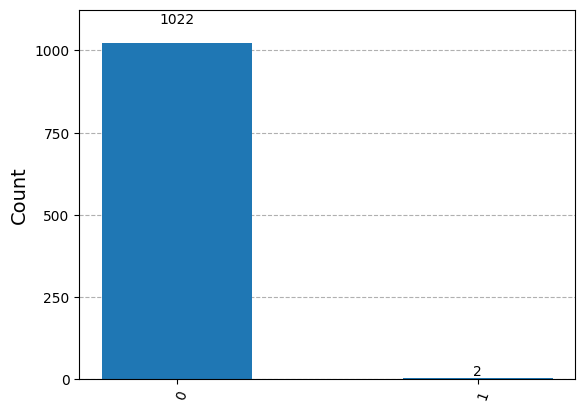

In [86]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [87]:
counts

{'0': 1022, '1': 2}

Despite preparing a bunch of spins in the "up" state, we find that a few are being measured in the "down" state. These quantum machines are cooled to $\sim 15$ mK and isolated from their environment. But errors still creep into even circuits as simple as ours. It works <i>pretty</i> well, but it isn't perfect. In general, the larger the circuit, the more error you will find.

<b>Note: </b> Part of the reason for forcing all jobs through Qiskit Runtime is that error correction is incorporated <i>automatically</i>. Until very recently, there were <i>a lot</i> more erroneous counts that would crop up. Part of the reason the Sampler is billed as a means for constructing <i>quasi</i>-probability distributions rather than probability distributions is that simple error correction can lead to <i>negative</i> counts. While that might seem (really) bad, it doesn't lead to many complications when these <i>quasi</i>-probability distributions are used to compute other observables. But negative probabilities still aren't physical, so... <i>quasi</i>-probability distributions. Fortunately, none of this is relevant for these simple cases!

Take a moment to congratulate yourself. You just ran a job on an actual quantum computer! The good news is that the basic process does not get much more complicated than this. So let's try to do something a little more interesting.

## Measuring other observables

Perhaps we would like to measure $\hat{S}^{x}$ instead of $\hat{S}^{z}$. Take a moment to ask yourself what kind of result you <i>expect</i> in this case. 

As a practical matter, it should be noted that the only "measurement" we can make is actually the operator $\hat{S}^{z}$. In other language, we can only perform measurements in the <i>computational basis</i>, which returns ```0``` or ```1``` as a result for the qubit state. In order to get around this, we can apply a trick: we simply rotate the system so that the new $z$ axis is aligned with the orignal $x$ axis. By measuring $\hat{S}^{z}$ in this rotated state, we're effectively measuring $\hat{S}^{x}$ on the original state. A great explanation of this strategy can be found [here](https://arxiv.org/abs/2206.14584).

But <i>how</i> do we "rotate" the system? To actually do anything interesting to these qubits, we apply <b>quantum gates</b> which change the state of the system. You can think of these gates as unitary operators. For example, there is a gate $X$ which corresponds to the operator $\hat{S}^{x}$ with the same ($Y$ and $Z$) for $\hat{S}^{y}$ and $\hat{S}^{z}$. I will introduce various gates as we need them.

Quite conveniently for us, there are rotation gates, $R_{x}(\theta)$, $R_{y}(\theta)$, and $R_{z}(\theta)$, which rotate the system about $x$, $y$, or $z$ by an angle $\theta$. 

Conceptually, what we want to do is the following: imagine rotating the coordinate system by -90 degrees about the positive $y$ axis as shown below. If a spin were aligned perfectly along in the $+x$ direction, such a rotation would bring this spin into alignment with the $z$ axis. Performing a measurement, one would conclude the <i>rotated</i> system was in the state $\left|0\right\rangle$ (or, "spin up"). So measuring the so-called computational basis (or, $\hat{S}^{z}$) after a rotation is equivalent to measuring $\hat{S}^{x}$ in the original system.

The whole trick for measuring spin along <i>any</i> direction is to first rotate the system. If we wish to measure spin along some unit vector $\hat{n}(\theta,\phi)$, we can rotate the system by an amount $-\phi$ about the $z$ axis and then $-\theta$ about the $y$ axis. Such a series of operations will bring $\hat{n}(\theta,\phi)$ into alignment with the $z$ axis.


![axes](nhat.png)

All that remains is to simply add some rotation gates. To measure spin along the $x$ axis ($\theta = \frac{\pi}{2}$, $\phi = 0$) we simply need to rotate the system by $-\frac{\pi}{2}$ about the $y$ axis to map spin up/down (in this direction) to the computational basis (eigenstates of $\hat{S}^{z}$). The rotation gates can be accessed as ```rx(angle,qubit)```, ```rx(angle,qubit)```, ```rx(angle,qubit)```, where ```angle``` is the desired rotation angle and ```qubit``` specifies which qubit to rotate.


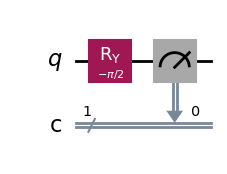

In [32]:
circ2 = QuantumCircuit(qr,cr)
circ2.ry(-np.pi/2,0)
circ2.measure(qr,cr)
circ2.draw('mpl')

So this circuit should simulate measuring $\hat{S}^{z}$ on the state $\left|+\right\rangle$. As you know, you cannot calculate what a given measurement should return. But you can calculate <i>expectation values</i>. This term is terribly misleading because we know that any individual measurement should return an eigenvalue of the operator being measured. The expectation value is simply the <i>expected</i> average of a large number of measurements repeated on identically prepared systems. What do you expect for $\left\langle \hat{S}^{x}\right\rangle$?

Let's see what the quantum computer gives! For efficiency, we'll make use of the simulator. But you could easily use the template above to try this on an actual device.

In [36]:
sampler = StatevectorSampler()

pub = (circ2)
job = sampler.run([pub], shots=nshots)
 
# Extract the result for the 0th pub (this example only has one pub).
result = job.result()[0]
counts_sim = result.data.c.get_counts()

In [37]:
counts_sim

{'0': 513, '1': 511}

Even the simulator results will differ slightly from case to case due to statistical fluctuations, but you should see roughly 50/50 split between the state being $\left|0\right\rangle$ and $\left|1\right\rangle$. Recall that we <i>rotated</i> the system before the measurement, so we now interpret $\left|0\right\rangle\rightarrow \left|+\right\rangle_{x}$ and $\left|1\right\rangle \rightarrow \left|-\right\rangle_{x}$ (instead of $\left|+\right\rangle$ and $\left|-\right\rangle$, respectively. This 50/50 split is consistent with $\left\langle \hat{S}^{x}\right\rangle = 0$, as one would expect for $\left|\psi\right\rangle = \left|+\right\rangle$.

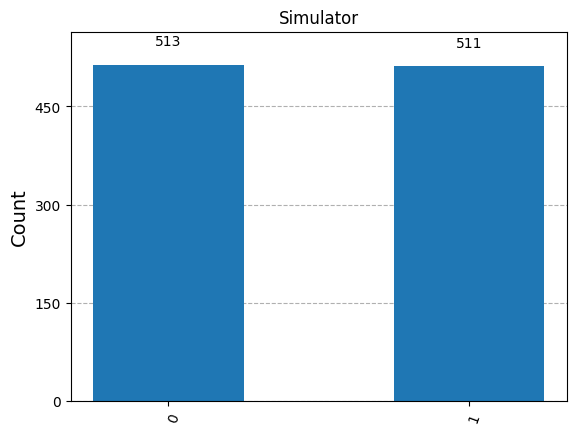

In [39]:
from qiskit.visualization import plot_histogram

plot_histogram(counts_sim, title="Simulator")

## Generating arbitrary states

So far, we have seen how to perform basic measurements of spin about any arbitrary direction. But we always begin with the same initial state, $\left|0\right\rangle \rightarrow \left|+\right\rangle$. Is it possible to generate other states?

Absolutely. I will note that we <i>could</i> just be really clever and show how what we have developed can be used directly to measure any component of spin for any initial state. We don't actually need to generate a state and rotate the desired measurement direction into the computational basis. But sometimes one operation is more convenient than the other. And for the case of <i>multiple</i> qubits, it's convenient to think of state initialization and measurement rotations as two separate processes. 

So let's begin!

Mathematically, how does one generate the state $\alpha\left|+\right\rangle + \beta \left|-\right\rangle$ from the state $\left|+\right\rangle$? This is equivalent to generating a vector by the following operation

$$\left(\begin{array}{c} \alpha\\ \beta \end{array}\right) = \hat{U}\left(\begin{array}{c}1\\ 0\end{array}\right).$$

The question becomes: what is $\hat{U}$ and how can I represent $\hat{U}$ as a quantum gate? We have already encountered the rotation gates, but there are much more general gates we can employ. First, let us note that $\alpha$ and $\beta$ are rather restricted. To ensure the state is normalized, we have $\left|\alpha\right|^{2} + \left|\beta\right|^{2} = 1$. Additionally, the overall phase of a state is physically unobservable.  That is, $e^{i\delta}\left|\psi\right\rangle$ is physically indistinguishable from $\left|\psi\right\rangle$. Putting these conditions together, we could parameterize the two complex numbers $\alpha$ and $\beta$ as two real numbers, $\theta$ and $\phi$,

$$\left(\begin{array}{c} \alpha\\ \beta \end{array}\right) \equiv \left(\begin{array}{c} \cos\frac{\theta}{2}\\ e^{i\phi}\sin\frac{\theta}{2} \end{array}\right)$$

As it happens, the most general single-qubit gate corresponds to the following operator:

$$\hat{U}(\theta,\phi,\lambda) \;\;\dot{=} \left(\begin{array}{cc} \cos\frac{\theta}{2} & -e^{i\lambda}\sin\frac{\theta}{2} \\ e^{i\phi}\sin\frac{\theta}{2} & e^{i(\lambda + \phi)}\cos\frac{\theta}{2}\end{array}\right)$$

Here I use the symbol $\dot{=}$ to make a distinction between the physical gate used in a real quantum computer to change the physical state of the system and the mathematical represenation of states as vectors and operators as matrices. You should verify that $\hat{U}\left|+\right\rangle$ <i>does</i> return the state $\cos\frac{\theta}{2}\left|+\right\rangle + e^{i\phi}\sin\frac{\theta}{2}\left|-\right\rangle$. 

<b>Technical aside: </b> This gate is referred to as a $\hat{U}_{3}(\theta,\phi,\lambda)$ gate in the Qiskit documentation due to its dependence on three parameters. There also exist gates $\hat{U}_{2}(\phi,\lambda) \equiv \hat{U}_{3}\left(\frac{\pi}{2},\phi,\lambda\right)$ and $\hat{U}_{1}(\lambda) \equiv \hat{U}_{3}\left(0,0,\lambda\right)$.

The proper syntax for adding a $\hat{U}$ gate to act on qubit ```q``` in some circuit ```mycirc``` is ```mycirc.u(theta,phi,lambda,q)```. Here are some optional exercises you can complete by copying, pasting, and lightly modifying statements above.

<b>Exercise: </b> Use what you know to generate the state $\left|+\right\rangle_{y} = \frac{1}{\sqrt{2}}\left(\left|+\right\rangle + i\left|-\right\rangle\right)$ and measure $\hat{S}^{x}$, $\hat{S}^{y}$, and $\hat{S}^{z}$. Note that based on what we've talked about, you'll need to design three separate circuits. Make sure to get simulator data and actual results. Before doing <i>any</i> programming, work out the values of $\theta$ and $\phi$ that you need (you can set $\lambda = 0$).

Also note: to measure $\hat{S}^{y}$, you'll have to perform <i>two</i> rotations before performing the measurement in the computational basis.

<b>Solution:</b>

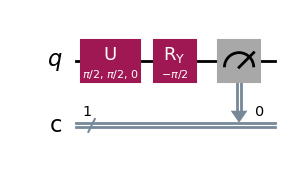

In [41]:
circsx = QuantumCircuit(qr,cr)
circsx.u(np.pi/2,np.pi/2,0,0)
circsx.ry(-np.pi/2,0)
circsx.measure(qr,cr)
circsx.draw('mpl')

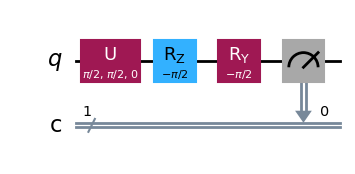

In [42]:
circsy = QuantumCircuit(qr,cr)
circsy.u(np.pi/2,np.pi/2,0,0)
circsy.rz(-np.pi/2,0)
circsy.ry(-np.pi/2,0)
circsy.measure(qr,cr)
circsy.draw('mpl')

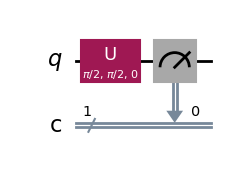

In [43]:
circsz = QuantumCircuit(qr,cr)
circsz.u(np.pi/2,np.pi/2,0,0)
circsz.measure(qr,cr)
circsz.draw('mpl')

In [ ]:
sampler = StatevectorSampler()

pub = (circ2)
job = sampler.run([pub], shots=nshots)
 
# Extract the result for the 0th pub (this example only has one pub).
result = job.result()[0]
counts_sim = result.data.c.get_counts()

In [44]:
samples = StatevectorSampler()

pubx = (circsx)
puby = (circsy)
pubz = (circsz)

jobx = sampler.run([pubz], shots=nshots)
joby = sampler.run([puby], shots=nshots)
jobz = sampler.run([pubz], shots=nshots)

resultx = jobx.result()[0]
resulty = joby.result()[0]
resultz = jobz.result()[0]

counts_sx = resultx.data.c.get_counts()
counts_sy = resulty.data.c.get_counts()
counts_sz = resultz.data.c.get_counts()

In [45]:
counts_sx

{'0': 530, '1': 494}

In [46]:
counts_sy

{'0': 1024}

In [47]:
counts_sz

{'0': 514, '1': 510}

Note that we created an eigenstate of $\hat{S}^{y}$, so all realizations had the same value $\left(+\frac{\hbar}{2}\right)$. But this state is a linear combination of the eigenstates of $\hat{S}^{x}$ or those of $\hat{S}^{z}$. The measured values of $\pm \frac{\hbar}{2}$ occur with roughly equal frequency for these two operators. Increasing the number of shots should show these measurements approaching a 50/50 split. We can actually increase the number of shots taken as follows:

In [48]:
samples = StatevectorSampler()
nshots = 8192

pubx = (circsx)
puby = (circsy)
pubz = (circsz)

jobx = sampler.run([pubz], shots=nshots)
joby = sampler.run([puby], shots=nshots)
jobz = sampler.run([pubz], shots=nshots)

resultx = jobx.result()[0]
resulty = joby.result()[0]
resultz = jobz.result()[0]

counts_sx = resultx.data.c.get_counts()
counts_sy = resulty.data.c.get_counts()
counts_sz = resultz.data.c.get_counts()

In [49]:
counts_sx

{'0': 4111, '1': 4081}

In [50]:
counts_sz

{'1': 4093, '0': 4099}

For actual quantum hardware, we would expect similar (but perhaps noisier) results.

<b>Challenge Exercise: </b> The histogram is a convenient means of visualizing the probabilities. But we can also quantify a statistical uncertainty from these measurements. Such an uncertainty is based on the variance of the measurements. The effective uncertainty $\delta S^{z}$ is given by the standard error of the mean

<!---$$\sigma^{2}_{S^{z}} = \frac{\left(\pm\frac{\hbar}{2}\right)^{2} + \left(\pm\frac{\hbar}{2}\right)^{2} + \cdots + \left(\pm\frac{\hbar}{2}\right)^{2}}{N} = \frac{\hbar^{2}}{4}$$--->

$$\delta S^{z} = \frac{\sigma_{S^{z}}}{\sqrt{N}}$$,

where $\sigma_{S^{z}}$ is the standard deviations in the measurements of $\hat{S}^{z}$. Thus, you can report the result as the expectation value, plus-or-minus some effective uncertainty. Calculate the expectation values explicitly for $\left\langle \hat{S}^{x}\right\rangle$, $\left\langle \hat{S}^{x}\right\rangle$, $\left\langle \hat{S}^{x}\right\rangle$ for the state $\left|+\right\rangle_{y} = \frac{1}{\sqrt{2}}\left(\left|+\right\rangle +i\left|-\right\rangle\right)$.

To accomplish this, you'll need to a little bit of Python dictionary gymnastics. Your counts are stored as a dictionary, meaning it's of the form:

```
{'0': 584, '1': 440}
```

You can retrieve actual counts by calling ```counts_sx['0']``` (which would return ```584```. The only hiccup is that in the case all the counts were (say) ```'1'```, ```counts_sx['0']``` would return an error. So you might need to check for the case where only one key exists and manually add the other entry with zero counts. Something like this would work:

```
if (len(counts_sx)==1):
    if (list(counts_sx.keys())[0]=='0'):
        counts_sx['1']=0
    else:
        counts_sx['0']=0
```

<b>Solution: </b> Here we use the simulations for simplicity, but this could easily be performed on the quantum hardware data. 

In [51]:
samples = StatevectorSampler()
nshots = 8192

pubx = (circsx)
puby = (circsy)
pubz = (circsz)

jobx = sampler.run([pubz], shots=nshots)
joby = sampler.run([puby], shots=nshots)
jobz = sampler.run([pubz], shots=nshots)

resultx = jobx.result()[0]
resulty = joby.result()[0]
resultz = jobz.result()[0]

counts_sx = resultx.data.c.get_counts()
counts_sy = resulty.data.c.get_counts()
counts_sz = resultz.data.c.get_counts()

Now let's clean up the dictionaries:

In [52]:
def clean_dictionary(dict):

    if (len(dict)==1):
        if (list(dict.keys())[0]=='0'):
            dict['1']=0
        else:
            dict['0']=0

    return dict

counts_sx = clean_dictionary(counts_sx)
counts_sy = clean_dictionary(counts_sy)
counts_sz = clean_dictionary(counts_sz)

From here it's straightforward to compute the averages and variances once we remember that a key of ```'0'``` corresponds to $+\frac{1}{2}$ and ```'1'``` corresponds to $-\frac{1}{2}$ (setting $\hbar = 1$, as discussed earlier). To use built-in functions, it's easy if we just reconstruct the actual measured values:

In [54]:
measurements_sx = 0.5*np.concatenate([np.ones(counts_sx['0']),-np.ones(counts_sx['1'])])
measurements_sy = 0.5*np.concatenate([np.ones(counts_sy['0']),-np.ones(counts_sy['1'])])
measurements_sz = 0.5*np.concatenate([np.ones(counts_sz['0']),-np.ones(counts_sz['1'])])

Sxavg = np.mean(measurements_sx)
Syavg = np.mean(measurements_sy)
Szavg = np.mean(measurements_sz)
                
dSx = np.sqrt(np.var(measurements_sx)/nshots)
dSy = np.sqrt(np.var(measurements_sy)/nshots)
dSz = np.sqrt(np.var(measurements_sz)/nshots)

And from here, we can display the results:

In [55]:
print('<Sx> = '+ str(Sxavg) + '+/-' + str(dSx))
print('<Sy> = '+ str(Syavg) + '+/-' + str(dSy))
print('<Sz> = '+ str(Szavg) + '+/-' + str(dSz))

<Sx> = 0.007568359375+/-0.005523638830493244
<Sy> = 0.5+/-0.0
<Sz> = -0.003173828125+/-0.005524160432876945


No surprises when we compare this to the histogram. But here you can see explicitly that $\left\langle \hat{S}^{x} \right\rangle \approx \left\langle \hat{S}^{z} \right\rangle \approx 0$ with comparable uncertainties. Since we began with an eigenstate of $\hat{S}^{y}$, this quantity is unambiguously defined, and we get no experimental uncertainty.

<h2>Introduction to the Estimator primitive</h2>

Suppose we wish to measure the three spin components on an actual quantum device. As we've formulated the measurements, we actually have three circuits. This absolutely could be done, but it's going to be cumbersome. It's also not great for efficiency to have three separate jobs that are to be run individually. Aside from the inconvenience of waiting on long queue times, it's always best to do as many related tasks as possible at once. The devices are calibrated daily, and there could be a noticeable sense "drift" over the timescales required to wait for these jobs to complete.

We have been making use of the basic Sampler primitive in which we run a circuit and get some bare counts. Spin expectation values were constructed through postprocessing of those counts ("<i>we'll do it in post!</i>"). The Estimator primitive is another way to "run" a quantum circuit in which expectation values are returned more efficiently. 

Let's see how this works in practice. We don't really care about the invididual counts as much as the expectation value(s) computed from them. So let us consider the simpler circuit which just creates the state $|+\rangle_{y}$ and does nothing more.

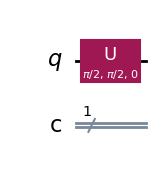

In [56]:
circ3 = QuantumCircuit(qr,cr)
circ3.u(np.pi/2,np.pi/2,0,0)
circ3.draw('mpl')

We can actually make use of built-in representations for the Pauli matrices to define operators for the spin components. This is <i>particularly</i> handy for multi-qubit systems where correlation functions can involve quite a bit of postprocessing to obtain from raw counts.

We'll define operators for each component as $\hat{S}^{\alpha} = \frac{1}{2}\hat{\sigma}^{\alpha}$ (working in units of $\hbar$, or doing the nasty theorist thing of $\hbar\rightarrow 1$).

In [73]:
from qiskit.quantum_info import SparsePauliOp
Sx = SparsePauliOp.from_list([("X", 0.5)])
Sy = SparsePauliOp.from_list([("Y", 0.5)])
Sz = SparsePauliOp.from_list([("Z", 0.5)])

It's shockingly simple to use the ```StatevectorEstimator``` to perform the desired measurements. Here the utility of the PUB becomes clearer. We lump our circuit <i>and</i> a list of the observables into the PUB and feed this to the estimator as a job. The execution is quite similar to what we did with the sampler.

In [74]:
from qiskit.primitives import StatevectorEstimator

estimator = StatevectorEstimator()

pub = (
    circ3,  # circuit
    [[Sx], [Sy], [Sz]],  # Observables
)

job_result = estimator.run(pubs=[pub]).result()

Here's the payoff. We just peel off the expectation values of those operators from the job data. No more dictionary gymnastics required!

In [75]:
sx_est = job_result[0].data.evs[0][0]
sy_est = job_result[0].data.evs[1][0]
sz_est = job_result[0].data.evs[2][0]

You can even extract estimates for standard deviation. This isn't particularly useful for the simulator (they all compute to <i>zero</i>), but it'll be helpful for more complicated circuits on real hardware.

In [76]:
dsx = job_result[0].data.stds[0][0]
dsy = job_result[0].data.stds[1][0]
dsz = job_result[0].data.stds[2][0]

In [77]:
print('<Sx> = '+ str(sx_est) + '+/-' + str(dsx))
print('<Sy> = '+ str(sy_est) + '+/-' + str(dsy))
print('<Sz> = '+ str(sz_est) + '+/-' + str(dsy))

<Sx> = 3.061616997868383e-17+/-0.0
<Sy> = 0.5+/-0.0
<Sz> = 1.1102230246251565e-16+/-0.0


Wasn't that <i>much</i> easier? Check out how easy it is to do all this on a real device. The only new step is that the operators themselves have to be converted to appropriate ISA format for the given device.

In [81]:
backend = service.least_busy(simulator=False, operational=True)
backend.name

'ibm_kyoto'

In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(circ3)

isa_Sx = Sx.apply_layout(layout=isa_circuit.layout)
isa_Sy = Sy.apply_layout(layout=isa_circuit.layout)
isa_Sz = Sz.apply_layout(layout=isa_circuit.layout)

from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator

estimator = Estimator(backend)
job = estimator.run([(isa_circuit,[[isa_Sx], [isa_Sy], [isa_Sz]])])

result = job.result()

In [88]:
from qiskit_ibm_runtime import QiskitRuntimeService

job = service.job('ct7zsgycvhg0008wkwm0')
job_result = job.result()

In [90]:
sx_est = job_result[0].data.evs[0][0]
sy_est = job_result[0].data.evs[1][0]
sz_est = job_result[0].data.evs[2][0]

dsx = job_result[0].data.stds[0][0]
dsy = job_result[0].data.stds[1][0]
dsz = job_result[0].data.stds[2][0]

print('<Sx> = '+ str(sx_est) + '+/-' + str(dsx))
print('<Sy> = '+ str(sy_est) + '+/-' + str(dsy))
print('<Sz> = '+ str(sz_est) + '+/-' + str(dsy))

<Sx> = -0.015099009900990099+/-0.007143006282310988
<Sy> = 0.49925742574257426+/-0.002301059922059285
<Sz> = 0.0037128712871287127+/-0.002301059922059285


One loses some low-level control by using the Estimator instead of the Sampler, but the gains in efficiency are pretty remarkable. 

## Version information:

In [91]:
import qiskit_ibm_runtime

qiskit_ibm_runtime.version.get_version_info()

'0.25.0'

In [93]:
import qiskit 

qiskit.version.get_version_info()

'1.1.1'